In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.343064    0.523008   
std     257.353842    0.486592    0.836071   12.956561    1.102743   
m

In [ ]:
# Fill null values of Age column
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

In [ ]:
# Droping Cabin column since many null values

df.drop("Cabin", axis=1, inplace=True)

In [ ]:
# fill null values of Embarked column with largest occuring value

print(df['Embarked'].value_counts())
df['Embarked'].fillna("S", inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


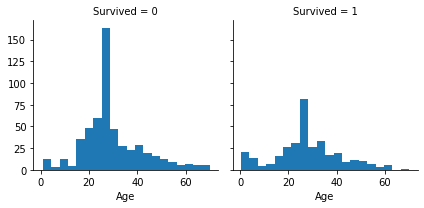

In [ ]:
ax = sns.FacetGrid(df,col = 'Survived')
ax.map(plt.hist,"Age", bins=20)


In [ ]:
df.loc[df['Age']>70,'Age'] = 70

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.250,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.500,C
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.125,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.550,S


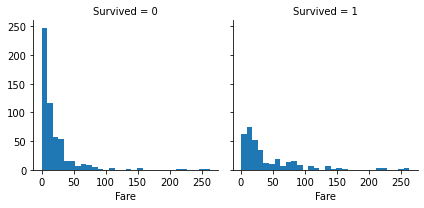

In [ ]:
ax = sns.FacetGrid(df, col='Survived')
ax.map(plt.hist, "Fare", bins=30)

# Outliers in 500

In [ ]:
# Fare column outlier solved:
df.loc[df['Fare'] > 400, 'Fare'] = df['Fare'].median()


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,S


In [ ]:
df.drop("PassengerId", axis=1, inplace=True)

In [ ]:
# Creating and transforming names

def title_name(name):
  if "," in name:
    return name.split(",")[1].split(".")[0].strip()

titles = set([title_name(x) for x in df['Name']])
print(titles)

def shorted_titles(x):
    titles = x["titles"]
    if titles in ['Capt','Col','Major']:
        return 'Officer'
    elif titles in ['Jonkheer', 'Don', 'the Countess', 'Lady', 'Sir']:
        return 'Royalty'
    elif titles =='Mme':
        return 'Mrs'
    elif titles in ['Mlle', 'Miss', 'Ms']:
        return 'Miss'
    else:
        return titles


{'Col', 'Ms', 'Lady', 'Mrs', 'Capt', 'Mme', 'Mr', 'Sir', 'Jonkheer', 'Dr', 'the Countess', 'Rev', 'Mlle', 'Don', 'Miss', 'Major', 'Master'}


In [ ]:
df['titles'] = df['Name'].map(lambda x: title_name(x))
df['titles'] = df.apply(shorted_titles,axis =1)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,S,Mr
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,S,Mrs
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,S,Mrs
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,Mrs
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,28.0,0,2,2668,22.3583,C,Mrs


In [ ]:
# Droping Name Column
df.drop("Name", axis=1, inplace=True)

In [ ]:
# Replacing all string format to Number format:

# Replacing Sex column : Male = 0 , Female = 1:
df['Sex'].replace(['male','female'],[0,1], inplace=True)



0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [ ]:
# Replacing Embarked column : S=0, C=1, Q=2
df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)

In [ ]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
712,1,1,0,48.0,1,0,19996,52.0000,0,Mr
886,0,2,0,27.0,0,0,211536,13.0000,0,Rev
310,1,1,1,24.0,0,0,11767,83.1583,1,Miss
43,1,2,1,3.0,1,2,SC/Paris 2123,41.5792,1,Miss
651,1,2,1,18.0,0,1,231919,23.0000,0,Miss


In [ ]:
# Checking for unique values in Titles:
df["titles"].value_counts().keys()

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Royalty', 'Officer'], dtype='object')

In [ ]:
# Replacing Mr=0,Miss=1, Mrs=2, Master =3, Dr=4, Rev=5, Royalty= 6,Officer=7
df['titles'].replace(df["titles"].value_counts().keys(),[0,1,2,3,4,5,6,7],inplace=True)

In [ ]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,2
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,1,35.0,1,0,113803,53.1000,0,2
4,0,3,0,35.0,0,0,373450,8.0500,0,0
5,0,3,0,28.0,0,0,330877,8.4583,2,0
6,0,1,0,54.0,0,0,17463,51.8625,0,0
7,0,3,0,2.0,3,1,349909,21.0750,0,3
8,1,3,1,27.0,0,2,347742,11.1333,0,2
9,1,2,1,14.0,1,0,237736,30.0708,1,2


In [ ]:
# Finding Correlation:
corr = df.corr()
corr.Survived.sort_values(ascending=False)


Survived    1.000000
Sex         0.543351
titles      0.359365
Fare        0.259289
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.065880
Pclass     -0.338481
Name: Survived, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Survived','Ticket'],axis =1)
y = df['Survived']
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.1)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val)*100,  2)
print("Accuracy of Random Forest:",acc_randomforest)

pickle.dump(randomforest, open('titanic_mode.sav', 'wb'))

Accuracy of Random Forest: 85.56


In [ ]:
df_test = pd.read_csv("test.csv")

df_test['titles'] = df_test['Name'].map(lambda x: title_name(x))

df_test['titles'] = df.apply(shorted_titles, axis=1)
id = df_test['PassengerId']

df_test['Age'].fillna(df['Age'].median(), inplace=True)
df_test['Embarked'].fillna('S', inplace=True)
df_test['Fare'].fillna(df['Fare'].median(), inplace=True)
df_test.drop(['Cabin','Ticket','Name','PassengerId'], axis=1, inplace=True)
df_test.Sex.replace(('male','female'),(0,1),inplace=True)
df_test.titles.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'),(0,1,2,3,4,5,6,7),inplace=True)
df_test.Embarked.replace(('S','Q','C'),(0,1,2),inplace=True)


In [ ]:
df_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titles
367,3,1,22.0,0,0,39.6875,0,2
407,1,0,50.0,1,1,211.5000,2,3
261,3,0,21.0,0,0,7.8542,0,3
199,3,1,28.0,0,0,8.1125,0,1
260,3,0,36.5,1,0,17.4000,0,0


In [ ]:
df1 = pd.read_csv("train.csv")
df1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
prediction = randomforest.predict(df_test)  # Prediction making
output = pd.DataFrame({'PassengerId':id-891, "Survived":prediction})
print(output)
# output.to_csv('submission.csv', index=False)

     PassengerId  Survived
0              1         0
1              2         0
2              3         0
3              4         1
4              5         0
..           ...       ...
413          414         0
414          415         1
415          416         0
416          417         0
417          418         1

[418 rows x 2 columns]
